In [25]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns


## Loading

In [9]:
anime = pd.read_csv('anime.csv', delimiter=',')
rating = pd.read_csv('rating.csv', delimiter=',')


In [10]:
print(anime.shape)
print(rating.shape)

(12294, 7)
(7813737, 3)


In [11]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [12]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [13]:
def first_look(df):
    print('dataset shape: \n')
    print('number of rows: ',df.shape[0],' number of columns: ',df.shape[1])
    print('dataset column names: \n')
    print(df.columns)
    print('columns data-type')
    print(df.dtypes)
    print('missing data')
    c=df.isnull().sum()
    print(c[c>0])

Anime dataset

In [14]:
first_look(anime)

dataset shape: 

number of rows:  12294  number of columns:  7
dataset column names: 

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')
columns data-type
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object
missing data
genre      62
type       25
rating    230
dtype: int64


rating dataset

In [15]:
first_look(rating)

dataset shape: 

number of rows:  7813737  number of columns:  3
dataset column names: 

Index(['user_id', 'anime_id', 'rating'], dtype='object')
columns data-type
user_id     int64
anime_id    int64
rating      int64
dtype: object
missing data
Series([], dtype: int64)


In [16]:
anime['episodes']=anime['episodes'].replace('Unknown',np.nan)
anime['episodes']=anime['episodes'].astype(float)

In [17]:
shared_id=anime[anime['anime_id'].isin(rating['anime_id'])]
shared_id['rating'].isnull().sum()

3

there are missing ratings in anime dataset, that have an anime_id in rating column

In [18]:
for i,j in zip(shared_id[shared_id['rating'].isnull()].index,shared_id[shared_id['rating'].isnull()]['anime_id'].values):
    median_value=rating[rating['anime_id']==j]['rating'].median()
    print('median value: ',median_value)
    anime.loc[i,'rating']=median_value
    print('index {} done!'.format(str(i)))

median value:  9.0
index 10898 done!
median value:  -1.0
index 10919 done!
median value:  7.0
index 10951 done!


In [19]:
anime.dropna(subset=['rating'],axis=0,inplace=True)

In [20]:
anime['genre']=anime['genre'].str.replace(', ',',')

In [21]:
anime=anime.drop_duplicates('name')

## EDA

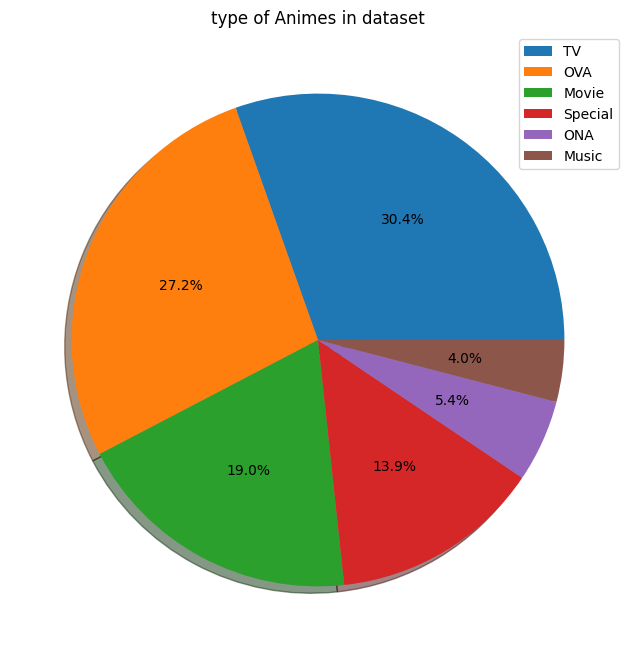

In [22]:
anime['type'].value_counts().plot.pie(autopct='%.1f%%',labels=None,shadow=True,figsize=(8,8))
plt.title('type of Animes in dataset')
plt.ylabel('')
plt.legend(anime['type'].value_counts().index.tolist(),loc='upper right')
plt.show()

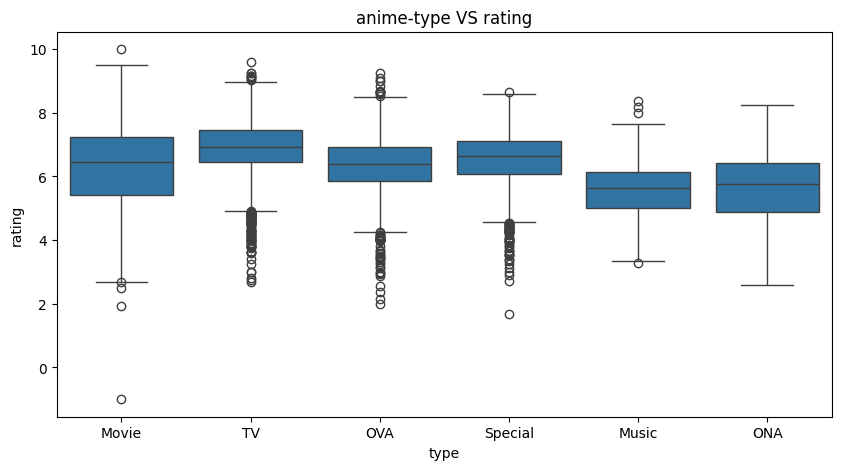

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='type',y='rating',data=anime)
plt.title('anime-type VS rating')
plt.show()

In [27]:
for i in anime['type'].unique().tolist():
    print('mean of '+str(i)+' :\n')
    print(anime[anime['type']==i]['rating'].mean())

mean of Movie :

6.315524597300827
mean of TV :

6.902299101062381
mean of OVA :

6.375220700152207
mean of Special :

6.523500897666069
mean of Music :

5.588995901639344
mean of ONA :

5.6432975460122705
mean of nan :

nan


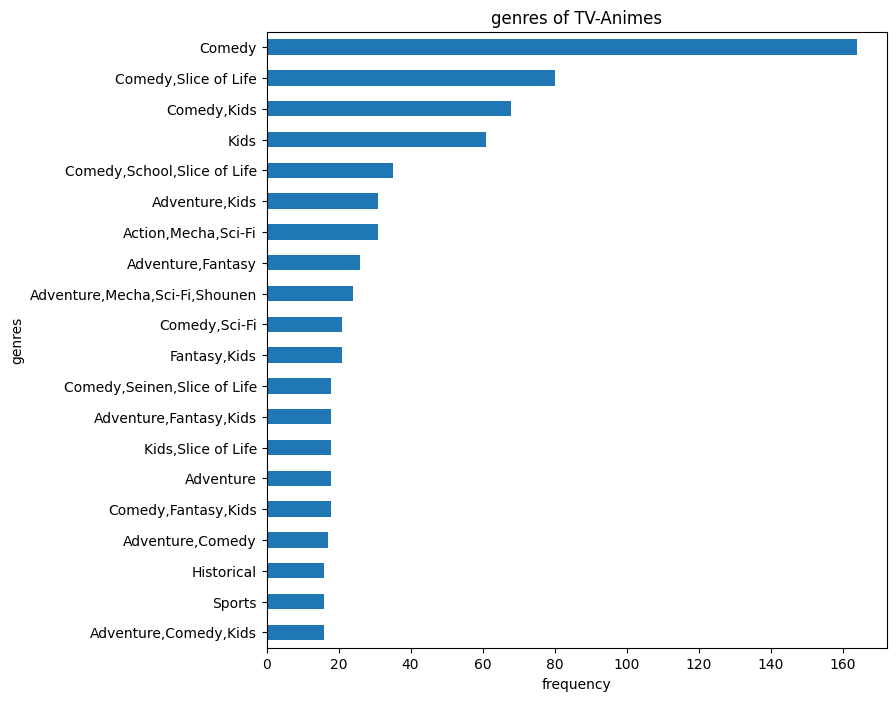

In [28]:
TV_anime=anime[anime['type']=='TV']
TV_anime['genre'].value_counts().sort_values(ascending=True).tail(20).plot.barh(figsize=(8,8))
plt.title('genres of TV-Animes')
plt.xlabel('frequency')
plt.ylabel('genres')
plt.show()

In [29]:
TV_anime.drop('anime_id',axis=1).describe()

,episodes,rating,members
count,3570.000000,3671.000000,3.671000e+03
mean,35.969468,6.902299,4.377497e+04
std,80.722257,0.863526,9.023887e+04
min,2.000000,2.670000,1.200000e+01
25%,12.000000,6.440000,4.740000e+02
50%,24.000000,6.940000,6.227000e+03
75%,39.000000,7.460000,4.597250e+04
max,1818.000000,9.600000,1.013917e+06


let's see which TV anime has the maximum episodes, and which has the minimum

In [30]:
TV_anime[TV_anime['episodes']==TV_anime['episodes'].max()]

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy,Slice of Life",TV,1818.0,6.18,160


In [31]:
TV_anime[TV_anime['episodes']==TV_anime['episodes'].min()]

,anime_id,name,genre,type,episodes,rating,members
8446,19121,Doctor Chichibuyama,"Ecchi,Parody,Seinen",TV,2.0,6.15,152


let's see which TV anime has the maximum rating, and which has the minimum

In [32]:
TV_anime[TV_anime['rating']==TV_anime['rating'].max()]

,anime_id,name,genre,type,episodes,rating,members
10400,30120,Spoon-hime no Swing Kitchen,"Adventure,Kids",TV,NaN,9.6,47


In [33]:
TV_anime[TV_anime['rating']==TV_anime['rating'].min()]

,anime_id,name,genre,type,episodes,rating,members
9854,29435,Ongaku Sekai Ryokou,"Kids,Music",TV,NaN,2.67,45


let's see which TV anime has the maximum members, and which has the minimum

In [34]:
TV_anime[TV_anime['members']==TV_anime['members'].max()]


,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery,Police,Psychological,Supernatural,Thri...",TV,37.0,8.71,1013917


In [35]:
TV_anime[TV_anime['members']==TV_anime['members'].min()]

,anime_id,name,genre,type,episodes,rating,members
10444,34490,Sushi Azarashi,Comedy,TV,30.0,3.0,12


let's see the distribution plots of rating, members

C:\Users\jermi\AppData\Local\Temp\ipykernel_28660\1760438478.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TV_anime[i],ax=ax)
C:\Users\jermi\AppData\Local\Temp\ipykernel_28660\1760438478.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TV_anime[i],ax=ax)


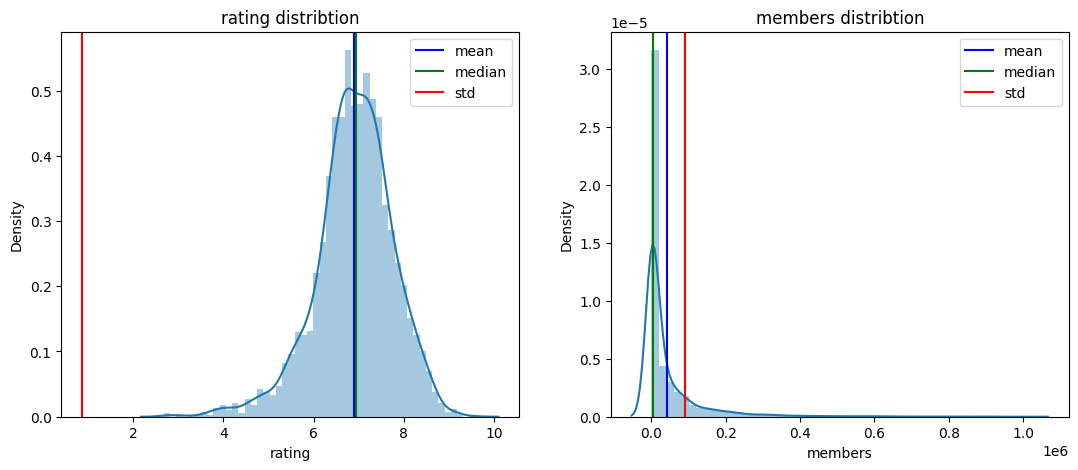

In [36]:
fig=plt.figure(figsize=(13,5))
for i,j in zip(TV_anime[['rating','members']].columns,range(3)):
    ax=fig.add_subplot(1,2,j+1)
    sns.distplot(TV_anime[i],ax=ax)
    plt.axvline(TV_anime[i].mean(),label='mean',color='blue')
    plt.axvline(TV_anime[i].median(),label='median',color='green')
    plt.axvline(TV_anime[i].std(),label='std',color='red')
    plt.title('{} distribtion'.format(i))
    plt.legend()
plt.show()

In [39]:
rating['user_id'].max()

73516

In [40]:
MRPU = rating.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [41]:
MRPU.head(10)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [45]:
user = pd.merge(rating,MRPU,on=['user_id','user_id'])

In [46]:
user.head(5)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [48]:
# merge 2 dataset
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,mean_rating
0,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,99,5,5.687023
1,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,152,10,7.699301
2,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,244,10,8.729242
3,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,271,10,7.372287
4,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,278,-1,4.181818
5,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,322,10,8.356322
6,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,398,10,-0.832298
7,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,462,8,7.374593
8,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,490,10,8.062500
9,32281,Kimi no Na wa.,"Drama,Romance,School,Supernatural",Movie,1.0,9.37,200630,548,10,8.112360


In [50]:
mergedata.shape

(7813725, 10)

In [49]:
mergedata.to_csv("merged_anime_data.csv", index=False)